#### Name : Royan Dsouza              
#### Roll No: 21
#### Date: 28/1/25
### EXP 3 : Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.

In [107]:
!pip install numpy pandas matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [108]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
#STEP-2 Input Data
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [110]:
#Step-3 Create model and fit data
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
#STEP-4 Get coefficient and print
w = model.coef_[0]
b = model.intercept_
print(f"The slope is: {w} ")
print(f"The intercept is: {b} ")


The slope is: 1.4999999999999993 
The intercept is: 0.3333333333333348 


In [112]:
#STEP-5 Make predictions
y_pred = model.predict(x)
print("\nprediction for training data")
for xi,yi,ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y={yi}, Preicted y = {ypi}")


prediction for training data
x = 1, Actual y=2, Preicted y = 1.8333333333333341
x = 2, Actual y=3, Preicted y = 3.3333333333333335
x = 3, Actual y=5, Preicted y = 4.833333333333333


In [113]:
#STEP-6 Calculate Error
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared error is:{mse}")
print(f"R2_Score is: {r2}")

Mean Squared error is:0.05555555555555553
R2_Score is: 0.9642857142857143


### LR  using MLE

In [114]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [115]:
#STEP-2 Input Data
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [116]:
#STEP-3 Negative Log Lifelihood function
def neg_log_likelihood(params):
    w, b = params
    sigma2= 1 #assume variance = 1
    y_pred = w*x + b
    nll = 0.5*np.sum((y-y_pred)**2 / sigma2)
    return nll

In [117]:
# initial values 
initial_guess= [0,0]


In [118]:
#STEP-4 Minimize nll
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print (f"Slope is : {w_mle}")
print (f"Intercept is: {b_mle}")


Slope is : -8.3681841778443e-08
Intercept is: 3.3333335569014952


In [119]:
#STEP-5 A Prediction
y_pred = w_mle * x + b_mle
print("\nprediction for training data")
for xi,yi,ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y={yi}, Preicted y = {ypi}")


prediction for training data
x = 1, Actual y=2, Preicted y = [3.33333347]
x = 2, Actual y=3, Preicted y = [3.33333339]
x = 3, Actual y=5, Preicted y = [3.33333331]


In [120]:
#STEP-6 Calculate Error
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared error is:{mse}")
print(f"R2_Score is: {r2}")

Mean Squared error is:1.555555722919247
R2_Score is: -1.0759094459800167e-07


### LR using GD

In [121]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
#STEP-2 Input Data
x = np.array([1,2,3])
y = np.array([2,3,5])

In [123]:
#Step-3 Create model and fit data
w, b = 0, 0
alpha = 0.001 
n_iter = 1000
n = len(x)



In [124]:
for i in range (n_iter):
    y_pred = w*x.flatten() + b 
    dw = (-2/n)*np.sum(x.flatten()*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)
    w = w - alpha * dw
    b -= alpha*db
print(f"Slope is: {w}")  
print(f"Bias is: {b}") 

Slope is: 1.4053515088658695
Bias is: 0.5484380558026539


### LR USING GD WITH SINGLE PARAMETER

In [125]:
import numpy as np 
import matplotlib.pyplot as plt

In [126]:
#STEP-2 Input Data
x = np.array([1,2,3])
y = np.array([2,3,5])
n = len(x) 

In [127]:
#STEP-3 Calculate loss function
def loss(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1*x + w0
    return np.sum((y-y_pred)**2)

In [128]:
#STEP-4 Calculate gradiet of j wrt w1
def gradient(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1*x + w0
    return -2*np.sum(x*(y-y_pred))

In [129]:
#STEP-5 Gradient decent
lr = 0.1
w1 = 4
iter = 15
w1_values = []
loss_values = []

for i in range (iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr*grad

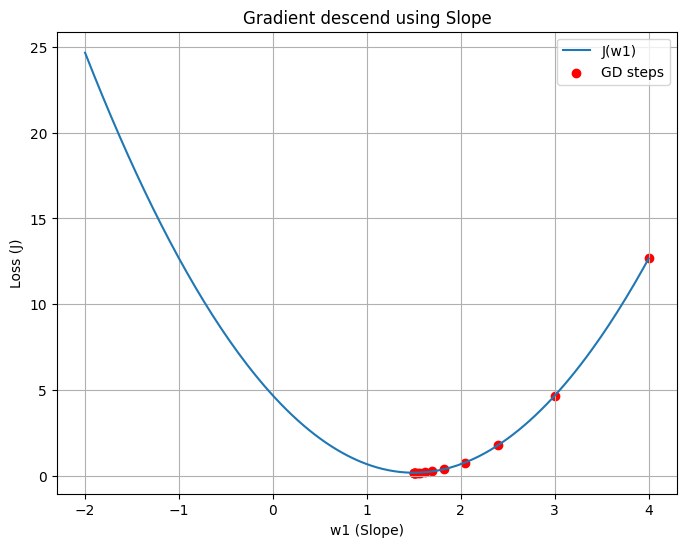

In [130]:
#STEP-6 Plot loss function and GD
w_space = np.linspace(-2, 4 , 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize = (8,6))
plt.plot(w_space, loss_space, label="J(w1)")
plt.scatter(w1_values, loss_values, color="red" , label="GD steps")
plt.xlabel("w1 (Slope)")
plt.ylabel("Loss (J)")
plt.title("Gradient descend using Slope")
plt.legend()
plt.grid(True)
plt.show()
                      